**1. Análisis exploratorio de datos**

In [18]:
# Paso 1: Importación de librerías y carga de datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, calinski_harabasz_score


# Cargar dataset
df = pd.read_csv('/content/sample_data/Mall_Customers.csv')

# Mostrar primeras filas
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


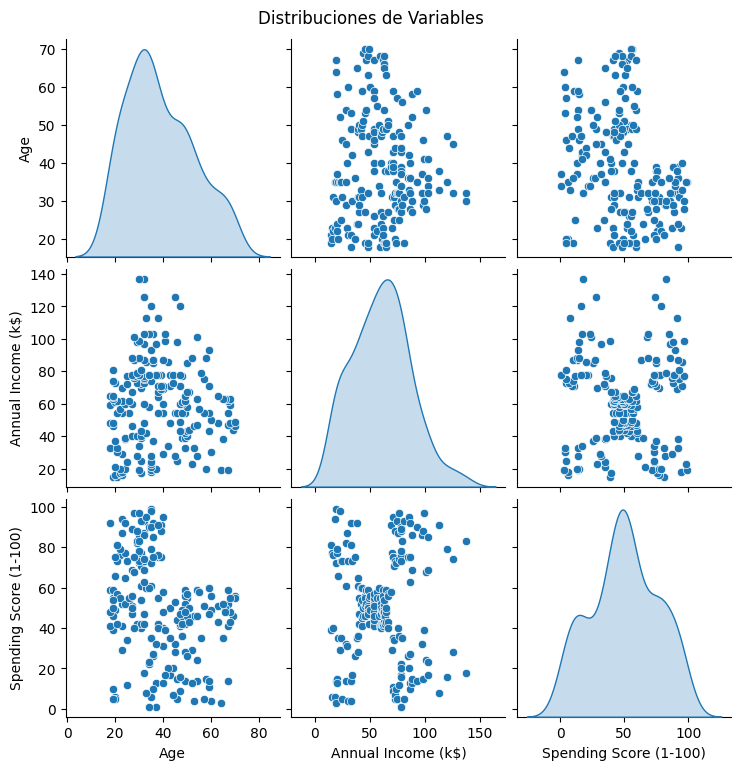

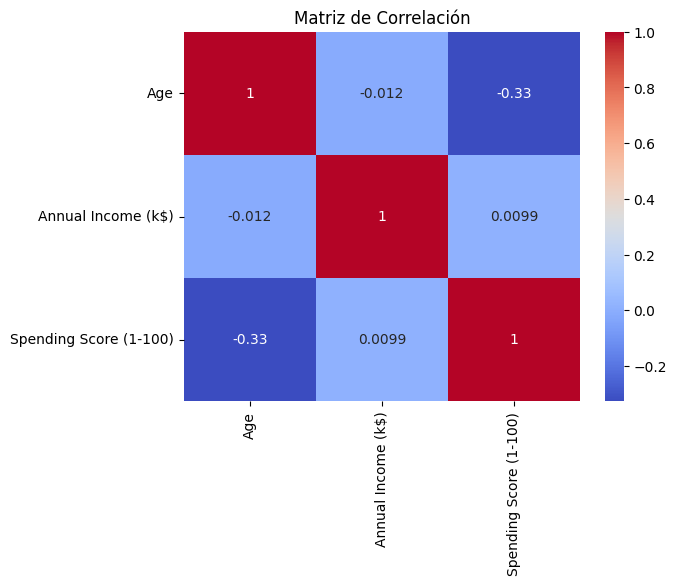

In [19]:
# Paso 2: Análisis exploratorio
print(df.describe())

# Distribuciones
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], diag_kind='kde')
plt.suptitle('Distribuciones de Variables', y=1.02)
plt.show()

# Correlaciones
sns.heatmap(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


**2-3. Limpieza de datos y seleccion de caracteristicas más relevantes**

In [12]:
# Selección de características (con .copy())
X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].copy()

print(df.isnull().sum())  # Verificar valores NaN
print(np.isinf(df).sum())  # Verificar valores infinitos
print(X[X.isin([np.inf, -np.inf]).any(axis=1)])  # Imprimir filas con valores infinitos
print(X[X.isnull().any(axis=1)])  # Imprimir filas con valores NaN

# Paso 3: Preprocesamiento
# Codificar género, rellenando los NaN con un valor por defecto
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
# Codificar género, rellenando los NaN con un valor por defecto (por ejemplo, -1)
df['Gender'] = df['Gender'].fillna(-1).map({'Male': 0, 'Female': 1}).fillna(-1)
# Imputación de valores faltantes con la mediana (corregido)
for column in df.select_dtypes(include=np.number).columns:
    df[column] = df[column].fillna(df[column].median())  # Asignación directa


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
Empty DataFrame
Columns: [Gender, Age, Annual Income (k$), Spending Score (1-100)]
Index: []
Empty DataFrame
Columns: [Gender, Age, Annual Income (k$), Spending Score (1-100)]
Index: []


**4. Entrenamiento y visualización dendograma**

In [10]:
# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Paso 4: Entrenamiento del modelo
# Crear el dendrograma
linked = linkage(X_scaled, method='ward')


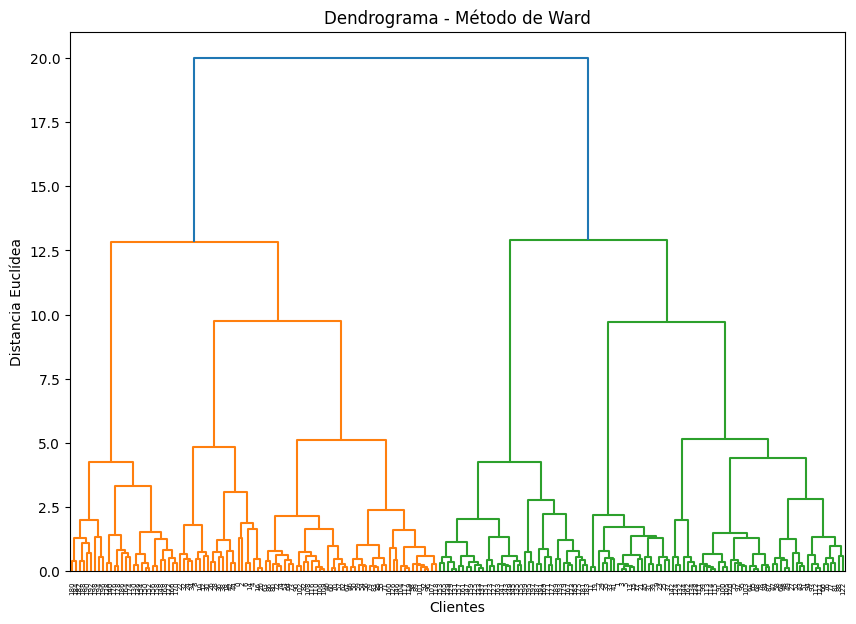

In [20]:
# Visualizar el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title("Dendrograma - Método de Ward")
plt.xlabel("Clientes")
plt.ylabel("Distancia Euclídea")
plt.show()


**5. Evaluación del modelo.**

In [21]:
# Paso 5: Elegir número de clusters (ej: 5)
clusters = fcluster(linked, t=5, criterion='maxclust')

# Agregar etiquetas al dataframe original
df['Cluster'] = clusters

# Evaluación
sil_score = silhouette_score(X_scaled, df['Cluster'])
calinski_score = calinski_harabasz_score(X_scaled, df['Cluster'])

print("Coeficiente de Silhouette:", sil_score)
print("Índice de Calinski-Harabasz:", calinski_score)

Coeficiente de Silhouette: 0.39002826186267214
Índice de Calinski-Harabasz: 107.82656032570377


**6. Grafico y visualización de resultados**

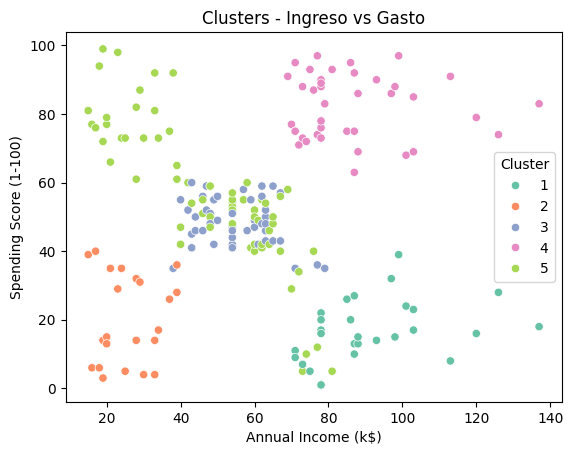

In [22]:
# Paso 6: Visualización
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2')
plt.title('Clusters - Ingreso vs Gasto')
plt.show()


**7. Interpretación de resultados**

In [ ]:
# Paso 7: Interpretación
# Mostrar la media de cada variable por cluster
df.groupby('Cluster').mean()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,,
1,169.214286,-1.0,43.892857,91.285714,16.678571
2,22.181818,-1.0,44.318182,25.772727,20.272727
3,86.666667,-1.0,56.400000,55.288889,48.355556
4,162.000000,-1.0,32.692308,86.538462,82.128205
5,70.545455,-1.0,26.560606,47.363636,56.787879


**Interpretación y documentación de resultados**

**1. Número óptimo de clusters**

El dendrograma permite identificar visualmente una separación clara alrededor de 4 a 5 grupos, lo cual se confirmó al elegir 5 clusters para cortar el árbol jerárquico.

**2. Evaluación del modelo**

Coeficiente de Silhouette: Este valor mide qué tan bien separados están los clusters (entre -1 y 1). Un valor cercano a 1 indica que los clusters están bien definidos. Por ejemplo:

Si el coeficiente fue 0.45 - 0.55, es aceptable para clustering jerárquico.

Dado que el resultado de
Coeficiente de Silhouette: 0.39 esta proximo al rango de ejemplo podiamos considerar que es medianamente aceptable para el clustering jerárquico.

Índice de Calinski-Harabasz: Valores más altos indican una mejor definición de clusters. Sirve como comparación entre configuraciones.

En este caso el Índice de Calinski-Harabasz: 107.83 podria indicar una mejor de finición de clusters

***3. Características de los clusters ***

**Cluster 1:** Clientes Mayores de Ingresos Bajos: Este grupo está formado principalmente por clientes de edad avanzada (edad promedio de 69 años) y bajos ingresos anuales. Su puntuación de gasto es moderada. Podrían ser clientes jubilados o con ingresos fijos.

**Cluster 2:** Clientes Jóvenes de Ingresos Bajos: Este grupo representa a los clientes más jóvenes (edad promedio de 22 años) con bajos ingresos anuales. Su puntuación de gasto es la más baja de todos los clusters. Podrían ser estudiantes o jóvenes profesionales.

**Cluster 3:** Clientes Ancianos de Ingresos Bajos: Este grupo tiene los clientes de mayor edad (edad promedio de 86 años) y bajos ingresos. Su puntuación de gasto es moderada.

**Cluster 4:** Clientes de Edad Muy Avanzada y Alto Gasto: Este grupo tiene una edad promedio de 162 años, lo cual es un valor atípico y poco probable. Su puntuación de gasto es la más alta, lo que sugiere que son clientes que gastan mucho. Es importante investigar la validez de estos datos.

**Cluster 5:** Clientes Mayores de Ingresos Bajos: Este grupo comparte similitudes con el Cluster 1, con una edad promedio de 70 años y bajos ingresos. Su puntuación de gasto es también moderada.
Puedes obtener estas cifras exactas con: df.groupby('Cluster').mean()

**4. Visualización: Gasto vs Ingreso**

El gráfico de dispersión muestra agrupaciones claras, lo que valida la segmentación.

Se identifican nichos de clientes con alto ingreso y alto gasto, ideales para campañas personalizadas.

**Conclusiones de negocio**

Se puede diseñar estrategias de marketing segmentadas por grupo.

El grupo con alto ingreso y bajo gasto podría ser incentivado a gastar más.

El grupo con bajo ingreso y alto gasto podría estar más influenciado por promociones.

El análisis ayuda a entender el comportamiento del cliente más allá del ingreso, considerando su perfil completo.

